In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
np.random.seed(1)

In [2]:
df_fake_news = pd.read_csv("https://raw.githubusercontent.com/sushmit86/bayes_rules/main/fake_news.csv",sep = ',')

In [3]:
df_fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    150 non-null    object 
 1   text                     150 non-null    object 
 2   url                      145 non-null    object 
 3   authors                  123 non-null    object 
 4   type                     150 non-null    object 
 5   title_words              150 non-null    int64  
 6   text_words               150 non-null    int64  
 7   title_char               150 non-null    int64  
 8   text_char                150 non-null    int64  
 9   title_caps               150 non-null    int64  
 10  text_caps                150 non-null    int64  
 11  title_caps_percent       150 non-null    float64
 12  text_caps_percent        150 non-null    float64
 13  title_excl               150 non-null    int64  
 14  text_excl                1

In [4]:
df_fake_news[['type','title_has_excl']].pivot_table( index='type', columns='title_has_excl',aggfunc=len, fill_value=0)

title_has_excl,False,True
type,,
fake,44,16
real,88,2


In [5]:
display(df_fake_news.type.value_counts())
display(df_fake_news.type.value_counts(normalize = True))
display(df_fake_news[['type','title_has_excl']].value_counts(normalize=True).reset_index(name='prop').sort_values(by='type'))

real    90
fake    60
Name: type, dtype: int64

real    0.6
fake    0.4
Name: type, dtype: float64

,type,title_has_excl,prop
1,fake,False,0.293333
2,fake,True,0.106667
0,real,False,0.586667
3,real,True,0.013333


In [68]:
# np.random.seed(1)
# df_init = pd.DataFrame({'type':['fake','real']})
# df_sample_1 = df_init.sample(n=10000,replace=True,weights = [0.4,0.6])
# df_sample_1.reset_index(drop=True)
# df_init=pd.DataFrame({'type':['fake','fake','real','real'],'title_has_excl':[False,True,False,True]})
# df_init.sample(n=10000,replace=True,weights = [0.4,0.6],axis=['type'])

In [6]:
df_init=pd.DataFrame({'type':['fake','fake','real','real'],'title_has_excl':[False,True,False,True]})
df_init.sample(n=10000,replace=True,weights = [0.29333,0.106667,0.586667,0.013333],ignore_index=True)

,type,title_has_excl
0,real,False
1,real,False
2,fake,False
3,fake,True
4,fake,False
...,...,...
9995,real,False
9996,fake,True
9997,fake,False
9998,fake,False


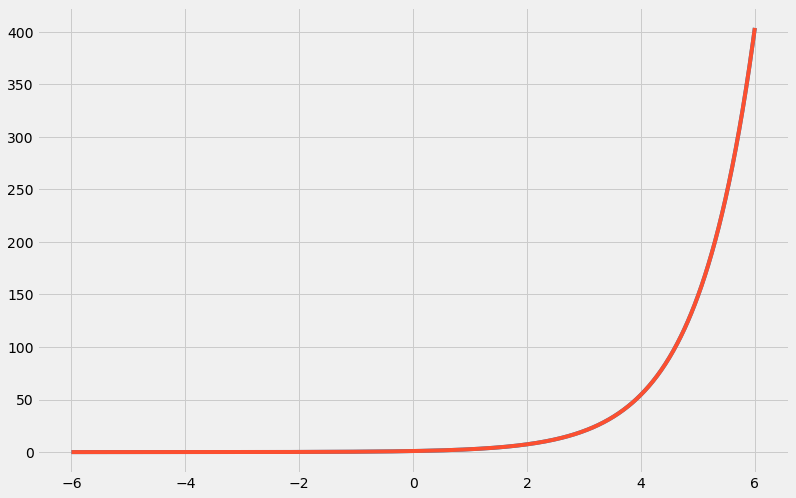

In [3]:
##plot e^x 
from scipy.special import factorial
x = np.linspace(-6,6,1000)
y = np.exp(x)
y_taylor = np.zeros_like(y)
n= 100
powers = np.arange(0,101)
arr_factorial = factorial(powers,exact=True)
for _index,_x in enumerate(x):
    y_taylor[_index] = np.sum(_x**powers/arr_factorial)
    
fig,axs = plt.subplots(1,1,figsize = (12,8))
axs.plot(x,y)
axs.plot(x,y_taylor)
plt.show()

(0.0, 4.0)

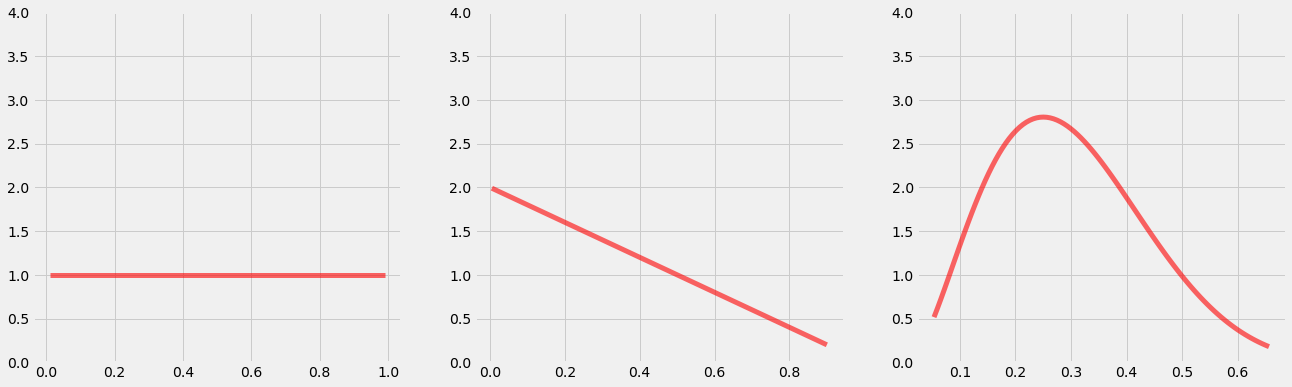

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import beta
a1,b1,a2,b2,a3,b3 = 1,1,1,2,3,7
x1 = np.linspace(beta.ppf(0.01, a1, b1),
                beta.ppf(0.99, a1, b1), 99)
y1 = beta.pdf(x1, a1, b1)

x2 = np.linspace(beta.ppf(0.01, a2, b2),
                beta.ppf(0.99, a2, b2), 99)
y2 = beta.pdf(x2, a2, b2)


x3 = np.linspace(beta.ppf(0.01, a3, b3),
                beta.ppf(0.99, a3, b3), 99)
y3 =beta.pdf(x3, a3, b3)
fig, axs = plt.subplots(1, 3,figsize = (20,6))

axs[0].plot(x1,y1,
       'r-', lw=5, alpha=0.6, label='beta pdf')
axs[0].set_ylim(0,4)


axs[1].plot(x2,y2,
       'r-', lw=5, alpha=0.6, label='beta pdf')
axs[1].set_ylim(0,4)

axs[2].plot(x3,y3,
       'r-', lw=5, alpha=0.6, label='beta pdf')
axs[2].set_ylim(0,4)


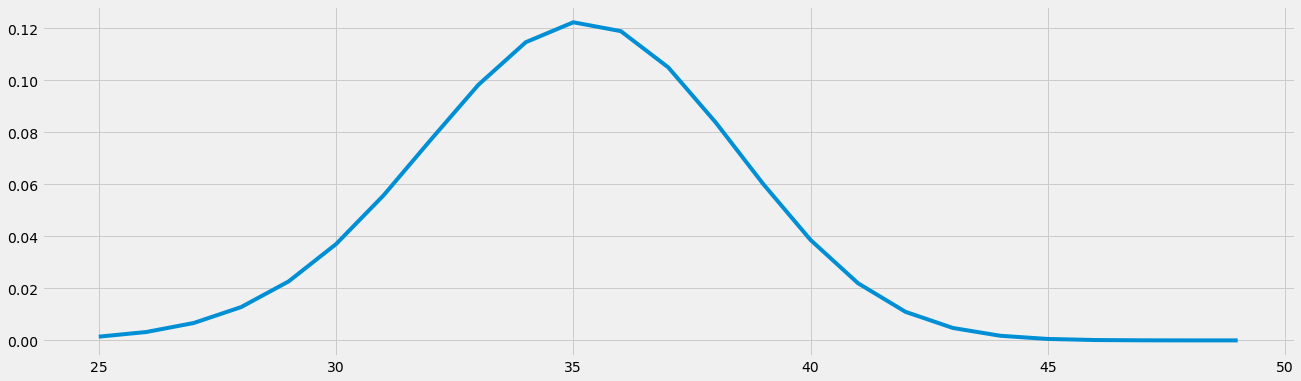

In [52]:
fig, axs = plt.subplots(1, 1,figsize = (20,6))
n1,p1 = 50,0.7

from scipy.stats import binom
dist = binom(n1,p1)

x = np.arange(dist.ppf(0.001),dist.ppf(1))
axs.plot(x,dist.pmf(x))